Achmad Fariz Rizky Yanuar. Universitas Sriwijaya

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

In [3]:
df = pd.read_csv("clustered_data.csv")
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,B2B,Fritz-Kola,Soft Drinks,1.87,18.0,0.05,31.98,Bremen,2021-05-13,3
1,B2C,Granini Apple,Juices,1.64,4.0,0.00,6.56,Sachsen,2022-10-16,1
2,B2C,Pepsi,Soft Drinks,1.74,5.0,0.00,8.70,Niedersachsen,2023-08-13,1
3,B2C,Hohes C Orange,Juices,1.80,15.0,0.00,27.00,Saarland,2022-10-06,1
4,B2B,Vio Wasser,Water,0.98,6.0,0.05,5.59,Niedersachsen,2021-09-20,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Memisahkan fitur dan target
y = df['Cluster']
X = df.drop(['Cluster', 'Order_Date', 'Product', 'Category', 'Region'], axis=1)  # drop kolom yang tidak dipakai di clustering
X['Customer_Type'] = X['Customer_Type'].map({'B2B': 0, 'B2C': 1}) # Encode Customer_Type

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest adalah algoritma ensemble yang menggabungkan banyak decision tree untuk menghasilkan prediksi yang lebih akurat dan stabil. Algoritma ini cocok digunakan pada data kami yang memiliki fitur numerik dan kategorikal hasil encoding, seperti Unit_Price, Quantity, dan Customer_Type. Random Forest dipilih karena mampu menangani hubungan kompleks antar fitur serta memberikan performa yang baik dalam klasifikasi cluster pelanggan.

In [10]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Logistic Regression adalah algoritma klasifikasi yang memodelkan probabilitas suatu data masuk ke kelas tertentu menggunakan fungsi logistik (sigmoid). Algoritma ini sederhana namun efektif, terutama untuk melihat pola linear antar fitur. Pada data kami, Logistic Regression digunakan untuk memprediksi cluster pelanggan berdasarkan variabel seperti Unit_Price, Quantity, Discount, dan Customer_Type, sehingga dapat membantu memahami pola segmentasi dengan interpretasi yang lebih mudah.

## **b. Evaluasi Model Klasifikasi**

In [12]:
# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

Random Forest Evaluation
Accuracy: 0.9973492379058979
F1-Score: 0.9973504935586226


array([[ 303,    0,    0,    4],
       [   0, 1644,    0,    0],
       [   0,    0,  662,    1],
       [   3,    0,    0,  401]])

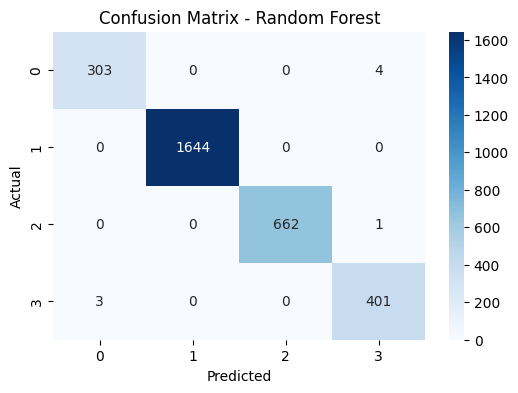

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Random Forest menunjukkan performa yang sangat baik dengan accuracy sebesar 99,73% dan F1-score sebesar 99,73%.
Dari confusion matrix, terlihat bahwa model hampir selalu memprediksi dengan benar, hanya terdapat sedikit kesalahan pada Cluster 0 (4 salah prediksi) dan Cluster 3 (3 salah prediksi). Ini menunjukkan bahwa Random Forest mampu menangkap pola kompleks dari fitur numerik dan kategorikal dalam dataset kami, yang terdiri dari Unit_Price, Quantity, Discount, Total_Price, dan Customer_Type. Dengan akurasi dan stabilitas tinggi, model ini sangat cocok untuk mengklasifikasikan segmentasi pelanggan berdasarkan hasil clustering sebelumnya.

In [15]:
# Logistic Regression Evaluation
y_pred_logreg = logreg_model.predict(X_test)
print("\nLogistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg


Logistic Regression Evaluation
Accuracy: 0.9900596421471173
F1-Score: 0.9900517851645911


array([[ 300,    0,    0,    7],
       [   0, 1641,    3,    0],
       [   0,   10,  653,    0],
       [   9,    0,    1,  394]])

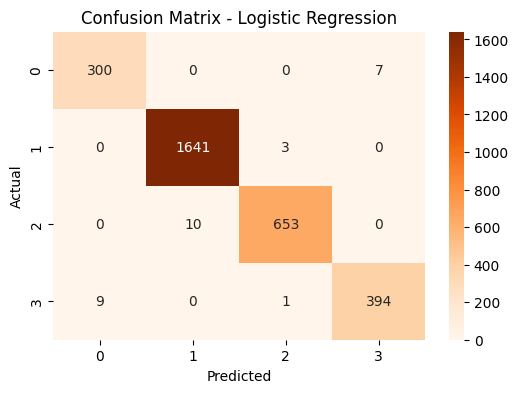

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Logistic Regression juga menunjukkan performa yang sangat baik dengan accuracy sebesar 99,01% dan F1-score sebesar 99,01%.
Pada confusion matrix, terdapat beberapa kesalahan klasifikasi, terutama di Cluster 0 (7 salah prediksi), Cluster 2 (10 salah prediksi), dan Cluster 3 (9 salah prediksi). Hal ini wajar karena Logistic Regression merupakan model linier yang cenderung kurang fleksibel dalam menangani pola yang kompleks. Namun, model ini tetap mampu memberikan hasil akurat secara keseluruhan dalam memetakan karakteristik pelanggan berdasarkan fitur numerik dan kategorikal yang tersedia.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi, Random Forest menunjukkan performa yang lebih unggul dengan accuracy dan F1-score yang hampir sempurna, yaitu sebesar 99,73%. Sementara itu, Logistic Regression juga menunjukkan hasil yang baik dengan accuracy dan F1-score sebesar 99,01%, namun terlihat sedikit kesulitan dalam memprediksi beberapa kelas, terutama pada cluster dengan pola yang cenderung tidak linier. Tidak ditemukan indikasi overfitting pada model Random Forest karena performa pada data uji tetap tinggi dan stabil. Sebaliknya, Logistic Regression dapat menghadapi kendala dalam menangani kompleksitas data yang lebih tinggi.

Sebagai tindak lanjut, disarankan untuk melakukan hyperparameter tuning pada Random Forest untuk mengoptimalkan performa dan memastikan konsistensi model. Selain itu, eksplorasi algoritma lain seperti Gradient Boosting atau XGBoost dapat menjadi opsi untuk mendapatkan hasil yang lebih maksimal. Memperluas dataset atau menambahkan fitur baru juga dapat membantu meningkatkan performa model klasifikasi di masa mendatang.